<a href="https://colab.research.google.com/github/prxrwx/Stat-learning-for-datasci/blob/main/Linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import module

import numpy as np
import pandas as pd
from scipy import stats
!wget http://www.donlapark.cmustat.com/229351/data/Auto.csv

--2021-12-13 04:31:52--  http://www.donlapark.cmustat.com/229351/data/Auto.csv
Resolving www.donlapark.cmustat.com (www.donlapark.cmustat.com)... 150.107.31.67
Connecting to www.donlapark.cmustat.com (www.donlapark.cmustat.com)|150.107.31.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18079 (18K) [text/csv]
Saving to: ‘Auto.csv’

Auto.csv            100%[===================>]  17.66K  72.4KB/s    in 0.2s    

2021-12-13 04:31:53 (72.4 KB/s) - ‘Auto.csv’ saved [18079/18079]



In [ ]:
# อ่านไฟล์ csv ก่อนเพื่อหา missing values
auto_df = pd.read_csv('Auto.csv',na_values=["?"])

# ลบแถวที่มี missing values
auto_df = auto_df.dropna()
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


* Predictor: $X = [x_1,x_2,\ldots,x_n]$
* Response: $y = [y_1,y_2,\ldots,y_n]$
* สมการ $\hat{y}_i = \hat{\beta}_0+\hat{\beta}_1x_i, \ \ \ \ $     $ i=1,2,\ldots,n$  

In [ ]:
X = auto_df['horsepower']
y = auto_df['mpg']

คำนวณสัมประสิทธิ์ $\hat{\beta}_0,\hat{\beta}_1$ ด้วยสูตร
\begin{align*}
\hat{\beta}_1 &= \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2} \\
&= \frac{\text{Cov}(X,y)}{\text{Var}(X)}\\
\hat{\beta}_0 &= \bar{y}-\hat{\beta}_1\bar{x}
\end{align*}
  
ใช้คำสั่ง $\texttt{np.cov(X,y)}=\begin{pmatrix}
\text{Var}(X)  & \text{Cov}(X,y) \\
\text{Cov}(y,X)  & \text{Var}(y)
\end{pmatrix}
$ สำหรับ covariance matrix ระหว่างเวกเตอร์ $\texttt{X}$ และ $\texttt{y}$  
ใช้คำสั่ง $\texttt{np.mean(X)}$ และ $\texttt{np.mean(y)}$ สำหรับค่าเฉลี่ยของเวกเตอร์ $\texttt{X}$ และ $\texttt{y}$

In [ ]:
# Let's start by implementing linear regression from scratch
# using numpy linear algebra

def linear_model(X, y):
    CoV = np.cov(X,y)
    beta_1 = CoV[0, 1] / CoV[0, 0]
    beta_0 = np.mean(y) - beta_1 * np.mean(X)
    return beta_0 , beta_1 

def predict(beta_0 , beta_1, X):
    return beta_0 + beta_1 * X

In [ ]:
beta_0, beta_1 = linear_model(X, y)
y_pred = predict(beta_0 , beta_1, X)

print(beta_0, beta_1)

39.93586102117046 -0.1578447333536535


In [ ]:
####นับจำนวนข้อมูล

print(y.shape)

n = y.shape[0]
print(n)

(392,)
392


####คำนวณ Residual Sum of Squares (RSS)
$$ \text{RSS} = \sum_{i=1}^n (y_i-\hat{y}_i)^2 $$
โดยใช้คำสั่งต่อไปนี้

$\texttt{np.sum}([x_1,x_2,...,x_n])=x_1+x_2+...+x_n$

$\texttt{np.square}([x_1,x_2,...,x_n])=[x_1^2,x^2_2,...,x^2_n]$

In [ ]:
# Calculate Residual Sum of Squares
RSS = np.sum(np.square(y - y_pred ))

print(RSS)

9385.915871932419


####คำนวณ Residual Standard Error (RSE)  
$$  \text{RSE} = \sqrt{\frac{\text{RSS}}{n-2}} $$

In [ ]:
# Calculate Residual Standard Error
RSE = np.sqrt(RSS/(n-2))

print(RSE)

4.90575691954594


####Code ข้างล่างนี้ใช้คำนวณ Standard Error (SE)  
\begin{align*}
\text{SE}(\hat{\beta}_0) &= \text{RSE}\sqrt{\frac{1}{n}+\frac{\bar{x}^2}{\sum_{i=1}^n (x_i-\bar{x})^2}} \\
\text{SE}(\hat{\beta}_1) &= \text{RSE}\sqrt{\frac{1}{\sum_{i=1}^n (x_i-\bar{x})^2}}
\end{align*}
ผลลัพธ์ที่ได้เป็น numpy array ที่มีสมาชิก 2 ตัว

In [ ]:
# Calculate the standard error of each coefficients

# SE(Beta0)
SE_beta_0 = RSE * np.sqrt( (1/n) + (np.square(np.mean(X)))/(np.sum(np.square(X - np.mean(X)))))

# SE(Beta1)
SE_beta_1 = RSE * np.sqrt(1/(np.sum(np.square(X - np.mean(X)))))

print('SE(β₀): ', SE_beta_0)
print('SE(β₁): ', SE_beta_1)

SE(β₀):  0.7174986555545264
SE(β₁):  0.006445500517685034


####คำนวณขอบล่าง (lower) และขอบบน (upper) ของ confidence interval
$$I_i = [\hat{\beta}_i-2\cdot\text{SE}(\hat{\beta}_i),\hat{\beta}_i+2\cdot\text{SE}(\hat{\beta}_i)]$$
แต่ละค่าที่ได้ต้องเป็นเวกเตอร์หรือ numpy array ที่มีสมาชิก 2 ตัว

In [ ]:
# Calculate 95% confidence interval

# Confidence interval of beta0 
lower_0 = beta_0 - 2 * SE_beta_0
upper_0 = beta_0 + 2 * SE_beta_0

# Confidence interval of beta1
lower_1 = beta_1 - 2 * SE_beta_1
upper_1 = beta_1 + 2 * SE_beta_1

print(f'Confidence interval of β₀: [{lower_0},{upper_0}]')
print(f'Confidence interval of β₁: [{lower_1},{upper_1}]')

Confidence interval of β₀: [38.50086371006141,41.37085833227951]
Confidence interval of β₁: [-0.17073573438902356,-0.14495373231828346]


#### Code ข้างล่างนี้แสดงผลของค่าทั้งหมดที่เราคำนวณไปแล้ว

In [ ]:
X = auto_df['horsepower']

# Present results
results = pd.DataFrame({'feature': ['Intercept', X.name],
                        'coefficients': [beta_0,beta_1],
                        'standard_error': [SE_beta_0,SE_beta_1],
                        '[0.025': [lower_0,lower_1],
                        '0.975]': [upper_0,upper_1]})

results

,feature,coefficients,standard_error,[0.025,0.975]
0,Intercept,39.935861,0.717499,38.500864,41.370858
1,horsepower,-0.157845,0.006446,-0.170736,-0.144954


#### statsmodels library สามารถคำนวณค่าต่าง ๆ เหล่านี้ได้ ผลที่แสดงจะคล้ายกับใน R  
#### มีสองวิธึในการทำ linear regression: $\texttt{statsmodels.api.sm.OLS}$ 
#### และ $\texttt{statsmodels.formula.api.smf.ols}$

In [ ]:
# The statsmodels library provides a convenient means to get the
# same statistics
import statsmodels.api as sm

X = auto_df['horsepower']

# add bias constant; 
#without this the equation turns into y = βx
X_one = sm.add_constant(X)     

y = auto_df['mpg']

# syntax is OLS(response, predictor)
Model = sm.OLS(y, X_one) 
results = Model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           7.03e-81
Time:                        04:44:19   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [ ]:
import statsmodels.formula.api as smf

#syntax is ols(formula, dataset)
model = smf.ols('mpg ~ horsepower', auto_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           7.03e-81
Time:                        04:44:36   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [ ]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


####จงตอบคำถามต่อไปนี้

1. จากโมเดลนี้ ถ้ารถยนต์มีแรงม้า 200 hp จะมีระยะการวิ่งเท่าไหร่ต่อแกลลอน
2. จงบอกความหมายของช่วงความเชื่อมั่นของ $\beta_1$ ที่ได้
3. ระหว่างช่วงความเชื่อมั่นของ $\beta_0$ และ $\beta_1$ ช่วงของสัมประสิทธิ์ใดกว้างกว่า

In [ ]:
print(beta_0+200*beta_1)

8.366914350439757


> 1. ถ้ารถยนต์มีแรงม้า 200 hp จะมีระยะการวิ่ง 8.37 mile/gal

> 2. มีความเป็นไปได้ 95% mujเมื่อรถยนต์มีแรงม้าเพิ่มขึ้น 1 hp ระยะการวิ่งของรถยนต์จะ**ลดลง**ในช่วง 0.171 ถึง 0.145 mile/gal

> 3. ช่วงความเชื่อมั่นของสัมประสิทธิ์ $\beta_0$ กว้างกว่าช่วงความเชื่อมั่นของสัมประสิทธิ์ $\beta_1$ 

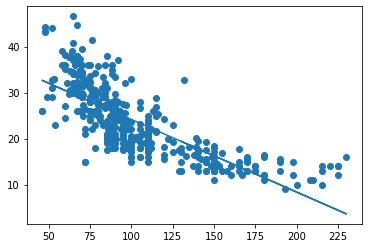

In [ ]:
import matplotlib.pyplot as plt

X = auto_df['horsepower']

# Scatter plot ของ x และ y
plt.scatter(X, y)

# เส้นของ linear regression
plt.plot(X, y_pred);